In [41]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv('bank_data.csv')

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
# Exploratroy Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [5]:
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [6]:
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [7]:
data.duplicated().sum()

0

<Axes: ylabel='actual_recovery_amount'>

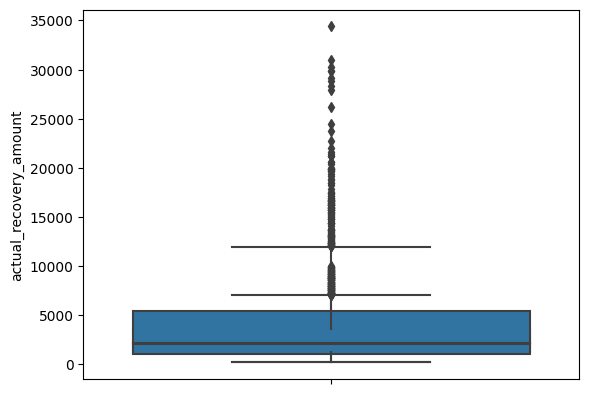

In [8]:

sns.boxplot(y='expected_recovery_amount', data=data)
sns.boxplot(y='actual_recovery_amount', data=data)

In [9]:
levels= data['recovery_strategy'].value_counts()

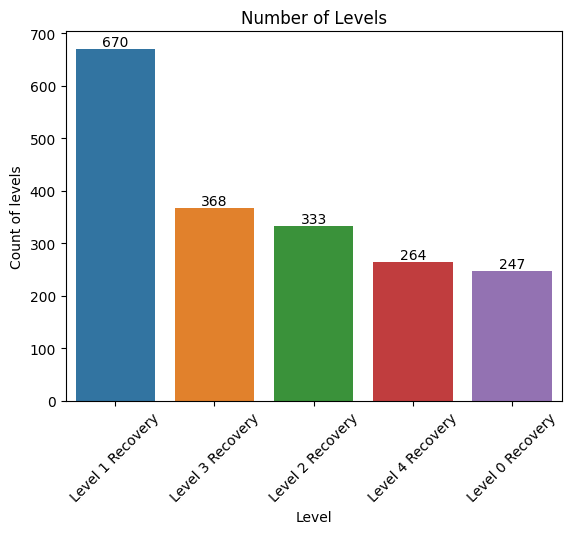

In [10]:
ax= sns.barplot(x=levels.index, y=levels.values)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Number of Levels')
plt.xlabel('Level')
plt.ylabel('Count of levels')
plt.xticks(rotation=45)
plt.show()

In [11]:
grouped_data=data.groupby('recovery_strategy')[['expected_recovery_amount', 'actual_recovery_amount']].mean()

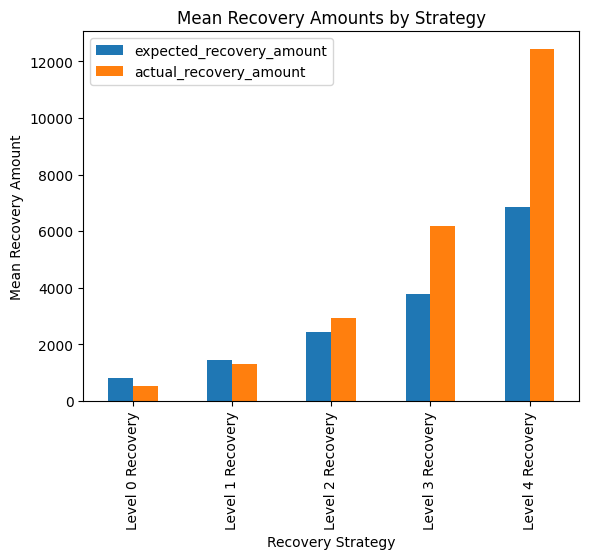

In [12]:
grouped_data.plot(kind='bar')
plt.title('Mean Recovery Amounts by Strategy')
plt.xlabel('Recovery Strategy')
plt.ylabel('Mean Recovery Amount')
plt.legend(loc='upper left')
plt.show()

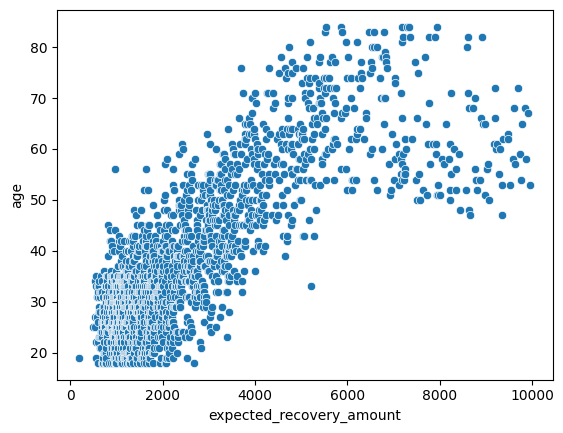

In [13]:
sns.scatterplot(x='expected_recovery_amount', y='age', data=data);


In [14]:
#Statistical test: age vs. expected recovery amount
Statistical_test= data[(data['expected_recovery_amount'] >=900) &(data['expected_recovery_amount']<=1100)]
Statistical_test.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
158,520,900,504.790,Level 0 Recovery,34,Male
159,1036,900,539.535,Level 0 Recovery,34,Female
160,1383,900,554.745,Level 0 Recovery,24,Male
161,998,901,887.005,Level 0 Recovery,32,Male
162,1351,903,667.035,Level 0 Recovery,28,Male


In [15]:
Statistical_test.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,184.000000,184.000000,184.000000,184.000000
mean,1155.407609,1005.978261,793.259904,27.978261
std,608.696055,56.892282,305.194499,6.158167
min,18.000000,900.000000,282.855000,18.000000
25%,603.000000,965.250000,556.083750,23.000000
50%,1277.000000,1003.500000,769.780993,28.000000
75%,1675.500000,1057.250000,957.146999,32.000000
max,2045.000000,1100.000000,2053.290126,56.000000


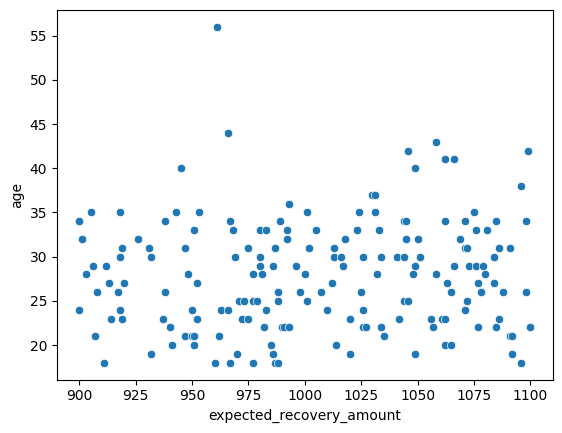

In [16]:
sns.scatterplot(x='expected_recovery_amount', y='age', data=Statistical_test);


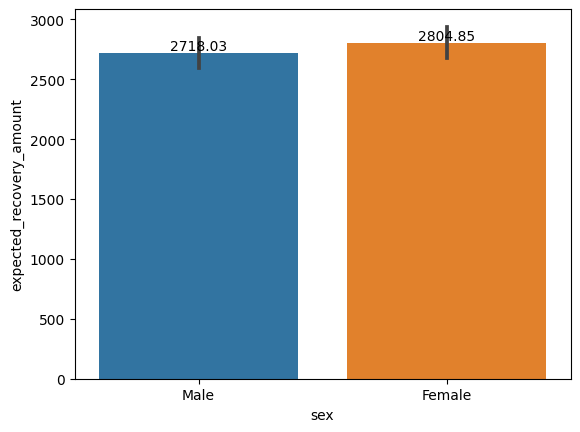

In [17]:
ax=sns.barplot(x='sex', y='expected_recovery_amount', data=data)

for bars in ax.containers:
        ax.bar_label(bars)

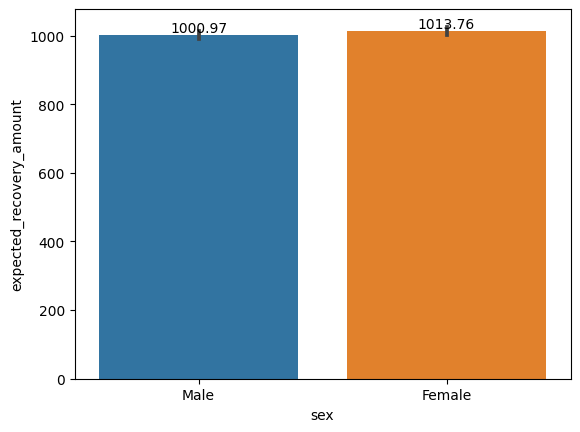

In [18]:
ax=sns.barplot(x='sex', y='expected_recovery_amount', data=Statistical_test)
for bars in ax.containers:
        ax.bar_label(bars)

<Axes: xlabel='expected_recovery_amount', ylabel='actual_recovery_amount'>

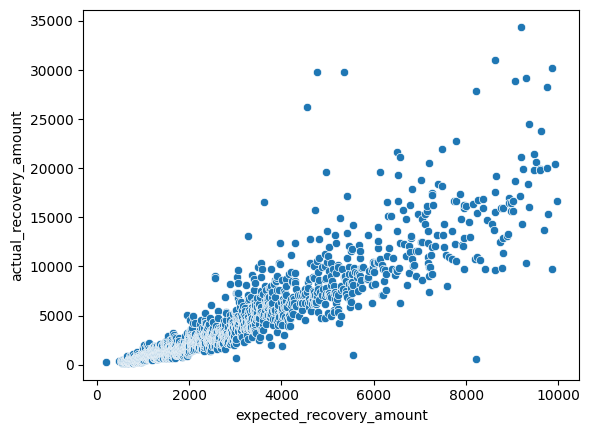

In [19]:
#Exploratory graphical analysis: recovery amount

sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=data)

In [20]:
Statistical_test.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,184.000000,184.000000,184.000000,184.000000
mean,1155.407609,1005.978261,793.259904,27.978261
std,608.696055,56.892282,305.194499,6.158167
min,18.000000,900.000000,282.855000,18.000000
25%,603.000000,965.250000,556.083750,23.000000
50%,1277.000000,1003.500000,769.780993,28.000000
75%,1675.500000,1057.250000,957.146999,32.000000
max,2045.000000,1100.000000,2053.290126,56.000000


In [21]:
era_900_1100 = data.loc[(data['expected_recovery_amount']<1100) & 
                      (data['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test 
Level_0_age = era_900_1100.loc[data['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[data['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age,Level_1_age) 

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

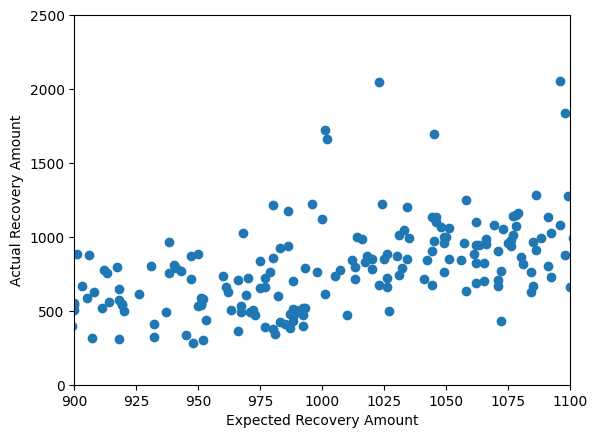

In [22]:
plt.scatter(x=data['expected_recovery_amount'], y=data['actual_recovery_amount'])
plt.xlim(900, 1100)
plt.ylim(0, 2500)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.show()


In [24]:
# Perform Kruskal-Wallis test
Level_0_actual = era_900_1100.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual) 

# Repeat for a smaller range of $950 to $1050
era_950_1050 = data.loc[(data['expected_recovery_amount']<1050) & 
                      (data['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[data['recovery_strategy']=="Level 0 Recovery"]['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[data['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual) 

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

In [36]:
# Build linear regression model

import statsmodels.api as sm

X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            02:15:52   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:

data['indicator_1000'] = np.where(data['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = data.loc[(data['expected_recovery_amount']<1100) & 
                      (data['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            02:15:53   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
era_950_1050 = data.loc[(data['expected_recovery_amount']<1050) & 
                      (data['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           1.12e-07
Time:                            02:24:05   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""